In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn import datasets
import sklearn.model_selection as ms

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
sns.set(style= 'ticks')

from sklearn.cluster import KMeans

##### loading the dataset from sklearn and assigning it the name as 'iris'

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [3]:
labels = pd.DataFrame(iris['target'], columns=['species'])

In [4]:
iris1 = pd.concat([data, labels], axis = 1)

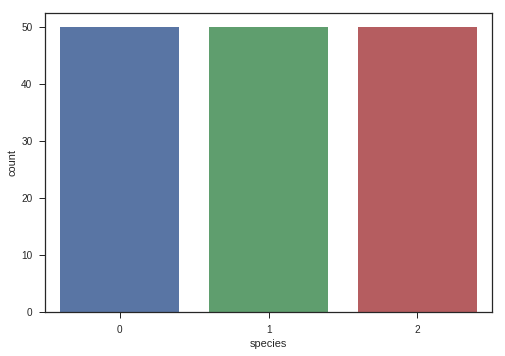

In [5]:
x = sns.countplot(x="species", data=iris1)

##### The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In [6]:
iris['data'][1:5]

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [7]:
data.shape

(150, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


##### the data consisits of 150 rows(observations) and 4 columns with column names as 'sepal length', 'sepal width', 'petal length', 'petal width'
##### All the columns do not have any null values

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [10]:
labels = pd.DataFrame(iris['target'], columns=['species'])

In [11]:
labels.describe()

species
count  150.000000
mean     1.000000
std      0.819232
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      2.000000

##### target is species with values 0, 1, 2 assigned to 'setosa', 'versicolor', 'virginica'(names of species).  mean is 1, std is 0.819232

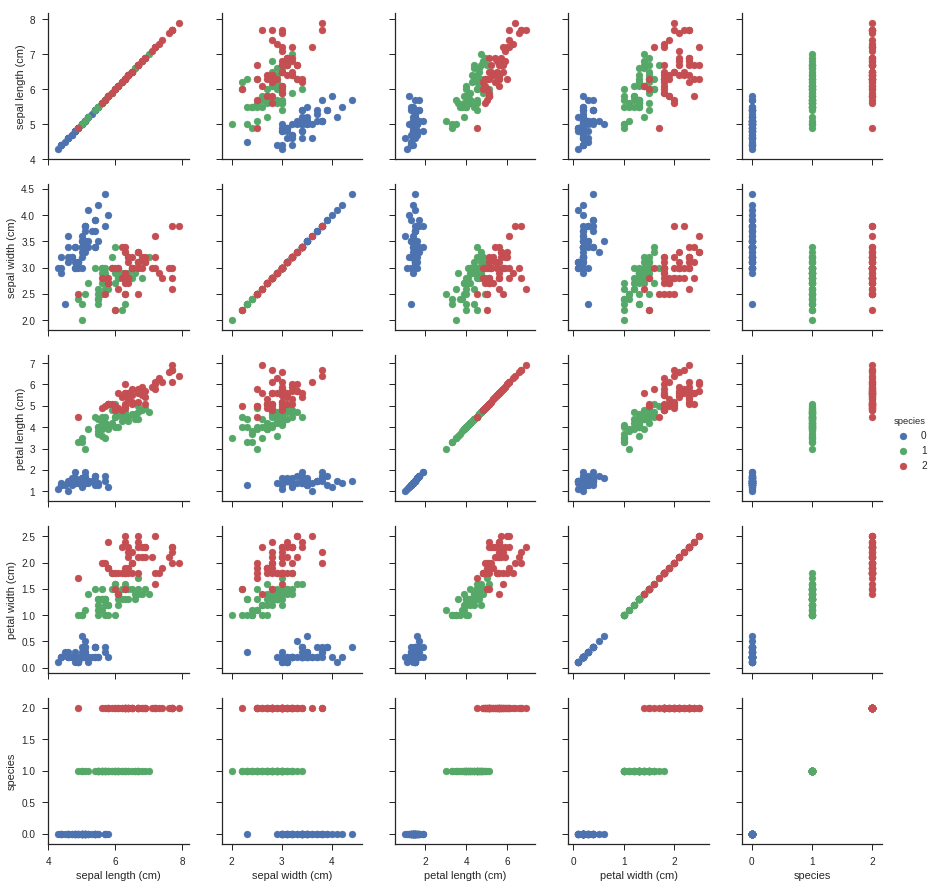

In [12]:
x = sns.PairGrid(iris1, hue = 'species')
x = x.map(plt.scatter)
x = x.add_legend()

##### a small fraction of Iris-virginica is mixed with Iris-versicolor (the mixed red-green nodes in the diagram) whereas Iris-setosa is found seperately without mixing with any of the other two

# Splitting the dataset

In [13]:
X_train, X_test, y_train, y_test = ms.train_test_split(iris['data'], iris['target'], test_size = 0.1, random_state=42) 

##### the dataset is splitted into train and test data with 10% of the data as test data and 90% as train dataset

In [14]:
X_train.shape

(135, 4)

In [15]:
y_train.shape

(135,)

In [16]:
X_train[0], y_train[0], X_train[1], y_train[1], X_train[2], y_train[2]

(array([ 6.3,  3.3,  4.7,  1.6]),
 1,
 array([ 6.5,  3. ,  5.8,  2.2]),
 2,
 array([ 5.6,  2.5,  3.9,  1.1]),
 1)

In [17]:
y_train_1 = (y_train == 1)

# Training the dataset

# SGD Classifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(X_train, y_train_1)

In [19]:
sgd_clf.predict([X_train[0]])

array([False], dtype=bool)

In [20]:
sgd_clf.predict([X_train[1]])

array([False], dtype=bool)

In [21]:
sgd_clf.predict([X_train[2]])

array([False], dtype=bool)

# randomforestclassifier

In [22]:
forest_clf = RandomForestClassifier(random_state=42)
x = forest_clf.fit(X_train, y_train_1)

In [23]:
forest_clf.predict([X_train[0]])

array([ True], dtype=bool)

In [24]:
forest_clf.predict([X_train[1]])

array([False], dtype=bool)

In [25]:
forest_clf.predict([X_train[2]])

array([ True], dtype=bool)

# Gaussian Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
x = gnb_clf.fit(X_train, y_train_1)
gnb_clf.predict([X_train[0]])

array([ True], dtype=bool)

In [27]:
gnb_clf.predict([X_train[1]])

array([False], dtype=bool)

In [28]:
gnb_clf.predict([X_train[2]])

array([ True], dtype=bool)

##### Used SGD, Randomforest ang Gaussian naive bayes classifiers for training the dataset

# Performance measures for the three classifiers

In [29]:
def performance(a,b,c):
    crossvalpredictions = cross_val_predict(a,b,c, cv=3) 
    con_mat = confusion_matrix(c, crossvalpredictions)
    pre_sco = precision_score(c, crossvalpredictions)
    rec_sco = recall_score(c, crossvalpredictions)
    f1_sco = f1_score(c, crossvalpredictions)
    #print('crossvalpredictions =', crossvalpredictions)
    print('confusionmatrix = ', con_mat)
    print('(prescisionscore, recallscore, f1score) = ', (pre_sco, rec_sco, f1_sco))

In [30]:
performance(sgd_clf, X_train, y_train_1)  # SGD Classifier

confusionmatrix =  [[60 31]
 [29 15]]
(prescisionscore, recallscore, f1score) =  (0.32608695652173914, 0.34090909090909088, 0.33333333333333331)


In [31]:
performance(forest_clf, X_train, y_train_1) # Randomforestclassifier

confusionmatrix =  [[89  2]
 [ 4 40]]
(prescisionscore, recallscore, f1score) =  (0.95238095238095233, 0.90909090909090906, 0.93023255813953487)


In [32]:
performance(gnb_clf, X_train, y_train_1)    # Gaussian Naive Bayes classifier

confusionmatrix =  [[86  5]
 [ 7 37]]
(prescisionscore, recallscore, f1score) =  (0.88095238095238093, 0.84090909090909094, 0.86046511627906985)


##### Among the three classifiers(SGD, Randomforest, GaussianNaiveBayes) used for training, Randomforestclassifier has got good precision, recall and f1 scores compared to the other two.

##### precision -0.95238095238095233, recall - 0.90909090909090906

In [164]:
res = pd.DataFrame(data = {'sgd-classifier': (0.32608695652173914, 0.34090909090909088, 0.33333333333333331),
             'randomforest':  (0.95238095238095233, 0.90909090909090906, 0.93023255813953487),
             'gaussianNB': (0.88095238095238093, 0.84090909090909094, 0.86046511627906985),
                          'all-scores': ('precision', 'recall', 'f1score')})

res1 = res.set_index('all-scores')
res1

gaussianNB  randomforest  sgd-classifier
all-scores                                          
precision     0.880952      0.952381        0.326087
recall        0.840909      0.909091        0.340909
f1score       0.860465      0.930233        0.333333

In [165]:
r = pd.DataFrame(res1.unstack(), columns = ['values']).reset_index()
r

level_0 all-scores    values
0      gaussianNB  precision  0.880952
1      gaussianNB     recall  0.840909
2      gaussianNB    f1score  0.860465
3    randomforest  precision  0.952381
4    randomforest     recall  0.909091
5    randomforest    f1score  0.930233
6  sgd-classifier  precision  0.326087
7  sgd-classifier     recall  0.340909
8  sgd-classifier    f1score  0.333333

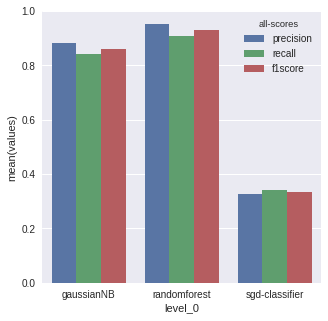

In [166]:
x = sns.barplot(data = r, x = 'level_0', y = 'values', hue = 'all-scores')

##### the above plot shows the precision, recall and f1 scores  for the three different classifiers used

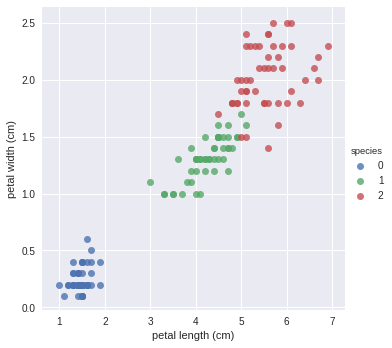

In [89]:
x = sns.lmplot(x = 'petal length (cm)', y = 'petal width (cm)', data = iris1, hue = 'species', fit_reg = False)

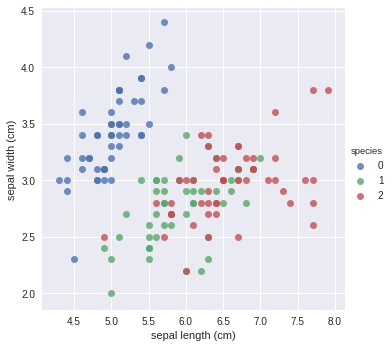

In [91]:
x = sns.lmplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris1, hue = 'species', fit_reg = False)

# unsupervised learning

##### Model used here for unsupervised learning is kmeans

In [51]:
from sklearn.decomposition import PCA 
model = PCA(n_components=2)
x = model.fit(X_train)
X_2D = model.transform(X_train)

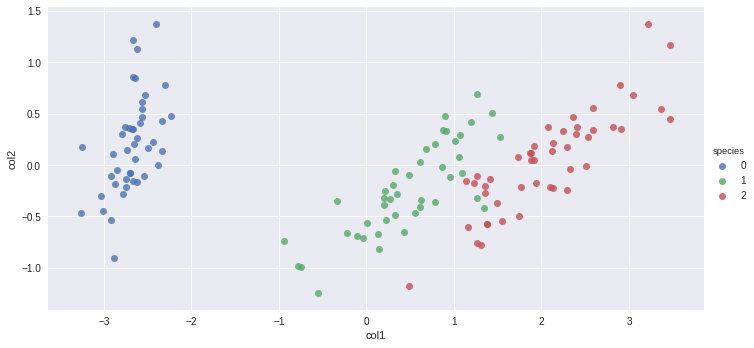

In [78]:
X = pd.DataFrame(X_2D, columns = ('col1', 'col2'))
X1 = pd.concat([X, pd.DataFrame(y_train, columns=['species'])], axis = 1)
x = sns.lmplot(x = 'col1', y = 'col2', data = X1, hue = 'species', fit_reg = False, size = 5, aspect=2)

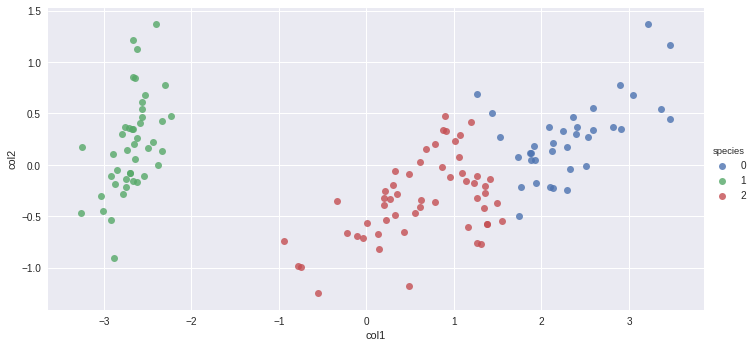

In [81]:
kmeans = KMeans(random_state=42, n_clusters = 3)
x = kmeans.fit(X_2D)
y = kmeans.labels_
X2 = pd.concat([X, pd.DataFrame(y, columns=['species'])], axis = 1)
x = sns.lmplot(x = 'col1', y = 'col2', data = X2, hue = 'species', fit_reg = False, size = 5, aspect=2)

# multiple class

In [177]:
crossvalpredictions = cross_val_predict(sgd_clf,X_train,y_train, cv=3) 
c_m = confusion_matrix(y_train, crossvalpredictions)
c_m

array([[43,  1,  0],
       [ 7, 35,  2],
       [ 0, 23, 24]])

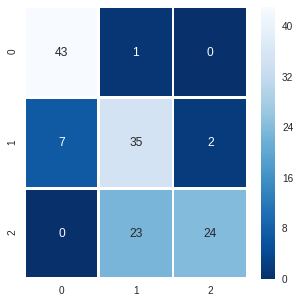

In [178]:
x = sns.heatmap(c_m, cmap='Blues_r', annot = True, linewidths=2,fmt='d')

In [179]:
crossvalpredictions = cross_val_predict(forest_clf,X_train,y_train, cv=3) 
c_m = confusion_matrix(y_train, crossvalpredictions)
c_m

array([[44,  0,  0],
       [ 0, 41,  3],
       [ 0,  4, 43]])

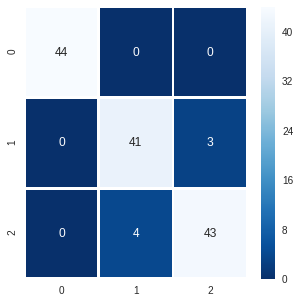

In [180]:
x = sns.heatmap(c_m, cmap='Blues_r', annot = True, linewidths=2,fmt='d')

In [181]:
crossvalpredictions = cross_val_predict(gnb_clf,X_train,y_train, cv=3) 
c_m = confusion_matrix(y_train, crossvalpredictions)
c_m

array([[44,  0,  0],
       [ 0, 39,  5],
       [ 0,  3, 44]])

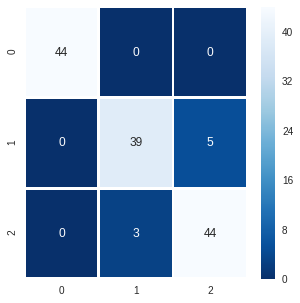

In [182]:
x = sns.heatmap(c_m, cmap='Blues_r', annot = True, linewidths=2,fmt='d')